In [105]:
!pip install flake8 pycodestyle_magic
%load_ext pycodestyle_magic
%pycodestyle_on

Cannot uninstall 'entrypoints'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


  Using cached https://files.pythonhosted.org/packages/ac/c6/44694103f8c221443ee6b0041f69e2740d89a25641e62fb4f2ee568f2f9c/entrypoints-0.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/84/f2/ed0ffb887f8138a8fe5a621b8c0bb9598bfb3989e029f6c6a85ee66628ee/pyflakes-2.1.1-py2.py3-none-any.whl
  Found existing installation: entrypoints 0.2.3
The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


In [1]:
from pipeline import Pipeline, Process, Postprocess, Preprocess
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join
import csv
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
class MyPreProcess(Preprocess):
    process_desc = "Exemple de pre-process -> ne fait rien"
    def run(self, images):
        pass


class MyProcess(Process):
    process_desc = "Exemple de process -> ne fait rien"
    def run(self, images):
        pass
    
    
class MyPostProcess(Postprocess):
    process_desc = "Exemple de post-process -> ne fait rien"
    def run(self, images):
        pass

In [3]:
pipeline = Pipeline()
process_array = np.array([MyPreProcess()
                          ,MyProcess()
                          ,MyPostProcess()
                          ,MyPreProcess(verbose=0)])
pipeline.add_processes(process_array)


Preprocess :  Exemple de pre-process -> ne fait rien
Process :  Exemple de process -> ne fait rien
Postprocess :  Exemple de post-process -> ne fait rien
Exemple de pre-process -> ne fait rien a été ajouté.
Exemple de process -> ne fait rien a été ajouté.
Exemple de post-process -> ne fait rien a été ajouté.
Exemple de pre-process -> ne fait rien a été ajouté.


In [4]:
pipeline.print_process()

Exemple de pre-process -> ne fait rien
Exemple de pre-process -> ne fait rien
Exemple de process -> ne fait rien
Exemple de post-process -> ne fait rien


### 6/01/20 : count number of elements in images

In [5]:
path = "C:/Users/chach/OneDrive/Documents/SID/M2/"
path1 = "Data_Interpromo/All Data/"

In [6]:
fname = path + "Data_Interpromo/All Data/SEATGURU_INFO_AIRCRAFT.csv"
ifile = open(fname, "rt")
 
airline_name = []
aircraft_type = []
category = []
flight_type = []
count = []
total_seat = []
seat_class = []
seat_type = []
seat_position = []

try:
    reader = csv.reader(ifile, delimiter = ";")
    for row in reader:
        airline_name.append(row[1])
        aircraft_type.append(row[2])
        category.append(row[3])
        flight_type.append(row[4])
        count.append(row[5])
        total_seat.append(row[6])
        seat_class.append(row[7])
        seat_type.append(row[8])
        seat_position.append(row[9])
finally:
    ifile.close()

In [7]:
len(airline_name)

10331

In [8]:
my_list = list(set(aircraft_type[2001:3000]))

In [9]:
fname = path + "Data_Interpromo/All Data/Correspondances_images.csv"
file = open(fname, 'wt', newline='')
 

try:
    writer = csv.writer(file, delimiter = ";")
    #écriture de l'entête
    writer.writerow(('Airline_Name', 'Aircraft_Type', 'Images'))
    
    for j in my_list:
        index = []
        for i in range(2001,3000):
            if j == aircraft_type[i] :
                index.append(i)
        #print(index)
        a = (str(min(index)+1) + "-" + str(max(index)+1))
        #print(a)
        writer.writerow((j, index))
        #print(j, min(index), max(index))

finally:
    file.close()
                

In [10]:
for j in my_list:
    #print(j)
    index = []
    for i in range(1,len(aircraft_type)):
        if j == aircraft_type[i]:
            index.append(i)
    #print(index)
    #a = min(index) + "-" + max(index)
    print(j, str(min(index)) + '-' + str(max(index)))

Bombardier Q200 C 2553-2556
A330-200 2537-2544
Airbus A321-100 2174-2179
Boeing 787-9 195-10330
Bombardier Q200 A 2545-2548
Airbus A350-1000 2956-2968
Airlines Airbus A319 2324-10145
A320-200 B 2515-7572
Airbus A380 2149-7446
Boeing 777-300ER E 2050-2064
Airways Boeing 777-300ER A 2999-3020
Boeing 787-9 V3 2136-2148
Boeing 767-300ER B 2001-2011
Boeing 777-200ER B 2024-5558
Boeing 777 300 2833-2850
Airlines ATR 72-600 2576-2579
Airlines Airbus A320 1484-10150
Boeing 777-300ER F 2065-2078
Boeing 747-400 C 2737-6131
Airbus A319 C 2622-4911
Boeing 787-800 C 2090-2102
Airbus A330 300 1703-5263
Airbus A321-200 V3 2200-9880
Boeing 777-200 3 2821-2832
787-8 2480-2490
Airbus A320-200 6-7082
A320-200 C 2524-2529
Airlines Q400 2372-7173
Airlines Airbus A321 1500-10155
Airbus A319 D 2628-2636
Airbus A320 V2 1094-9855
Airbus A330-300 296-9241
767-300ER 2472-2479
Embraer 170 B 2881-2883
Airbus A321-200 12-9864
Bombardier Q400 2557-10248
A319-111 2491-2498
Airbus A380 new 2692-6777
Airbus A320-200 E 

### 7/01/20 : template machine on exit

In [11]:
path = "C:/Users/chach/OneDrive/Documents/SID/M2/"
path1 = "Data_Interpromo/All Data/"
path2 = "ProjetInterpromo2020g8/images/"
path3 = "ANALYSE IMAGE/LAYOUT SEATGURU"

#### Separation of plans according to their type

In [12]:
files = [f for f in listdir(path+path1+path3) if isfile(join(path+path1+path3, f))]

In [13]:
type1_file = []
type2_file = []

for i in files:
    if i[len(i)-3:len(i)] == "jpg":
        type1_file.append(i)
    else:
        type2_file.append(i)

##### First type of image with SeatGuru, ex: Aeroflot_Russian_Airlines_Airbus_330_200_plane3.jpg

In [14]:
#img_rgb = cv2.imread(path + path1 + path3 + "/Aeroflot_Russian_Airlines_Airbus_330_200_plane3.jpg")
img_rgb = cv2.imread(path + path1 + path3 + "/Aeroflot_Russian_Airlines_Sukhoi_Superjet_100-95B_plane13.jpg")
#img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2HSV)
#greenMask = cv2.inRange(hsv, (26, 10, 30), (97, 100, 255))

In [15]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template1 = cv2.imread(path + path1 + 'ANALYSE IMAGE/Exit17.png',0)
template2 = cv2.imread(path + path1 + 'ANALYSE IMAGE/Exit16.png',0)
w1, h1 = template1.shape[::-1]
w2, h2 = template2.shape[::-1]

In [16]:
#cv2.imshow('plan', img_gray)
#cv2.imshow('template', template)

In [17]:
template = [template1, template2]
w = [w1, w2]
h = [h1, h2]

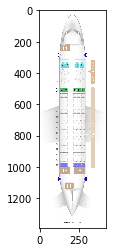

In [18]:
THRESHOLD : float = 0.9
coordinate_exit = []
for i in range(2):
    res = cv2.matchTemplate(img_gray,template[i],cv2.TM_CCOEFF_NORMED)
    loc = np.where( res >= THRESHOLD)
    for pt in zip(*loc[::-1]):
        cv2.rectangle(img_rgb, pt, (pt[0] + w[i], pt[1] + h[i]), (0,0,255), 2)
        coordinate_exit.append((pt[0] + w[i], pt[1] + h[i]))

    plt.plot,plt.imshow(img_rgb,cmap = 'gray')
    #plt.figure()
    cv2.imwrite('res' + str(i) + '.png',img_rgb)

In [19]:
coordinate_exit

[(126, 295),
 (114, 518),
 (129, 1085),
 (303, 296),
 (304, 296),
 (303, 297),
 (304, 297),
 (303, 1086),
 (302, 1087),
 (303, 1087)]

#### Display of all images in folder to check consistency

In [20]:
THRESHOLD : float = 0.9

template1 = cv2.imread(path + path1 + 'ANALYSE IMAGE/Exit17.png',0)
template2 = cv2.imread(path + path1 + 'ANALYSE IMAGE/Exit16.png',0)
w1, h1 = template1.shape[::-1]
w2, h2 = template2.shape[::-1]

template = [template1, template2]
w = [w1, w2]
h = [h1, h2]

coordinate = []
for img in type1_file:
    img_rgb = cv2.imread(path + path1 + path3 + "/" + img)
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
    
    coordinate_exit = []
    for i in range(2):
        res = cv2.matchTemplate(img_gray,template[i],cv2.TM_CCOEFF_NORMED)
        loc = np.where( res >= THRESHOLD)
        for pt in zip(*loc[::-1]):
            cv2.rectangle(img_rgb, pt, (pt[0] + w[i], pt[1] + h[i]), (0,0,255), 2)
            coordinate_exit.append((pt[0] + w[i], pt[1] + h[i]))

        #plt.plot,plt.imshow(img_rgb,cmap = 'gray')
        #plt.figure()
        cv2.imwrite(path + path1 + 'ANALYSE IMAGE/Type1/res' + str(img) + '.png',img_rgb)
    coordinate.append(coordinate_exit)

In [21]:
len(coordinate)

683

##### Second type of image with SeatGuru, ex: Qatar_Airways_Boeing_777-300ER_plane737.svg.png

In [22]:
img_rgb = cv2.imread(path + path1 + path3 + "/Qatar_Airways_Boeing_777-300ER_plane737.svg.png")
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread(path + path1 + 'ANALYSE IMAGE/Exit11.png',0)
w, h = template.shape[::-1]

True

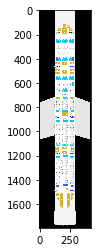

In [23]:
THRESHOLD : float = 0.7
coordinate_exit = []
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= THRESHOLD)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
    coordinate_exit.append((pt[0] + w, pt[1] + h))

plt.plot,plt.imshow(img_rgb,cmap = 'gray')
cv2.imwrite('res.png',img_rgb)

In [24]:
coordinate_exit

[(173, 190),
 (266, 190),
 (173, 191),
 (266, 191),
 (163, 471),
 (167, 471),
 (274, 471),
 (163, 884),
 (274, 884),
 (163, 1185),
 (167, 1185),
 (274, 1185),
 (274, 1492),
 (163, 1493),
 (274, 1493)]

#### Display of all images in folder to check consistency

In [25]:
THRESHOLD : float = 0.7
coordinate = []

for img in type2_file:
    img_rgb = cv2.imread(path + path1 + path3 + "/Qatar_Airways_Boeing_777-300ER_plane737.svg.png")
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
    template = cv2.imread(path + path1 + 'ANALYSE IMAGE/Exit11.png',0)
    w, h = template.shape[::-1]
    
    coordinate_exit = []
    res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
    loc = np.where( res >= THRESHOLD)
    for pt in zip(*loc[::-1]):
        cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
        coordinate_exit.append((pt[0] + w, pt[1] + h))

    #plt.plot,plt.imshow(img_rgb,cmap = 'gray')
    cv2.imwrite(path + path1 + 'ANALYSE IMAGE/Type2/res' + str(img) + '.png',img_rgb)
    coordinate.append(coordinate_exit)

In [26]:
len(coordinate)

512

Soit deux templates : Exit12 0,7 & Exit15 0,8
// Soit un : Exit11 0,7

### 8/01/20 : Kmeans & Knn

In [27]:
from sklearn.model_selection import RandomizedSearchCV
import math
from sklearn.cluster import KMeans
import numpy as np

In [28]:
plan = open(path + path1 + "ANALYSE IMAGE/coord-Aer_Lingus_Airbus_A330-200_plane4-NormalSeats.txt", "r")
data = plan.read()

In [29]:
list1 = []
list2 = []
data_array = data.replace('\n', ',').replace(' ','').split(',')

for i in range(0,len(data_array)-1,2):
    list1.append(int(data_array[i]))
    list2.append(int(data_array[i+1]))
    

In [31]:
liste = np.array(list(zip(list1,list2)))

#### Kmeans

In [32]:
random_grid = {'max_iter': [100, 150, 200, 250, 300, 350, 400],
               'n_clusters': [2,3,4,5,6,7,8,9,10,11, 12, 13, 14, 15],
               'init': ['k-means++', 'random'],
               'precompute_distances': ['auto', True, False],
               'algorithm' : ['auto', 'full', 'elkan']}

In [33]:
km = KMeans()

In [34]:
km_random = RandomizedSearchCV(estimator = km, param_distributions = random_grid, n_iter = 10, verbose=2, random_state=42, n_jobs = -1)
km_random.fit(liste)     
print(km_random.best_params_)

C:\Users\chach\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'precompute_distances': False, 'n_clusters': 14, 'max_iter': 350, 'init': 'random', 'algorithm': 'full'}


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.5s finished
C:\Users\chach\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [35]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(precompute_distances = False, n_clusters = 6, max_iter = 350, init = 'random', algorithm = 'full').fit(liste)
kmeans.labels_

kmeans.cluster_centers_

array([[ 200.85365854,  679.43902439],
       [ 165.        ,  799.30769231],
       [ 204.5       , 1021.        ],
       [ 201.475     , 1135.5       ],
       [ 251.56      ,  785.8       ],
       [ 203.07317073,  575.53658537]])

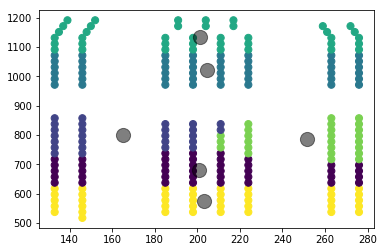

In [36]:
import matplotlib.pyplot as plt
y_kmeans = kmeans.predict(liste)
plt.scatter(liste[:, 0], liste[:, 1], c=y_kmeans, s=50)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

#### KNN

In [37]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
# X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
knn = NearestNeighbors(n_neighbors=6, algorithm='ball_tree').fit(liste)
distances, indices = knn.kneighbors(liste)

In [38]:
knn

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=6, p=2, radius=1.0)

In [39]:
y_knn = knn.predict(liste)
plt.scatter(liste[:, 0], liste[:, 1], c=y_knn, s=50)

centers = knn.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

AttributeError: 'NearestNeighbors' object has no attribute 'predict'

In [124]:
random_grid = {'n_neighbors': [2,3,4,5,6,7,8,9,10,11, 12, 13, 14, 15],
               'weights': ['uniform', 'distance'],
               'metric' : ['euclidean', 'minkowski'],
               'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}

1:33: E231 missing whitespace after ','
1:35: E231 missing whitespace after ','
1:37: E231 missing whitespace after ','
1:39: E231 missing whitespace after ','
1:41: E231 missing whitespace after ','
1:43: E231 missing whitespace after ','
1:45: E231 missing whitespace after ','
1:47: E231 missing whitespace after ','
1:50: E231 missing whitespace after ','


ValueError: too many values to unpack (expected 3)

1:33: E231 missing whitespace after ','
1:35: E231 missing whitespace after ','
1:37: E231 missing whitespace after ','
1:39: E231 missing whitespace after ','
1:41: E231 missing whitespace after ','
1:43: E231 missing whitespace after ','
1:45: E231 missing whitespace after ','
1:47: E231 missing whitespace after ','
1:50: E231 missing whitespace after ','


ValueError: too many values to unpack (expected 3)